# GraphSimulation

Small simulation framework for graphs with functional blocks. Initially intended as an emulator for simple analog computers. Connect functional blocks like Integrators, Adders and Comparators into a larger system and simulate in time domain.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

from utils import (
    load_simulation_from_file,
    save_simulation_to_file
)

## Load Simulation from File

In [2]:
sim = load_simulation_from_file("example.txt")

## Iterations

In [3]:
data = [[] for _ in range(len(sim.blocks))]
time = []

for _ in range(100):
    
    sim.update()
    
    time.append(sim.time)
    for i, val in enumerate(sim.get_state().values()):
        data[i].append(val)


Text(0, 0.5, 'states')

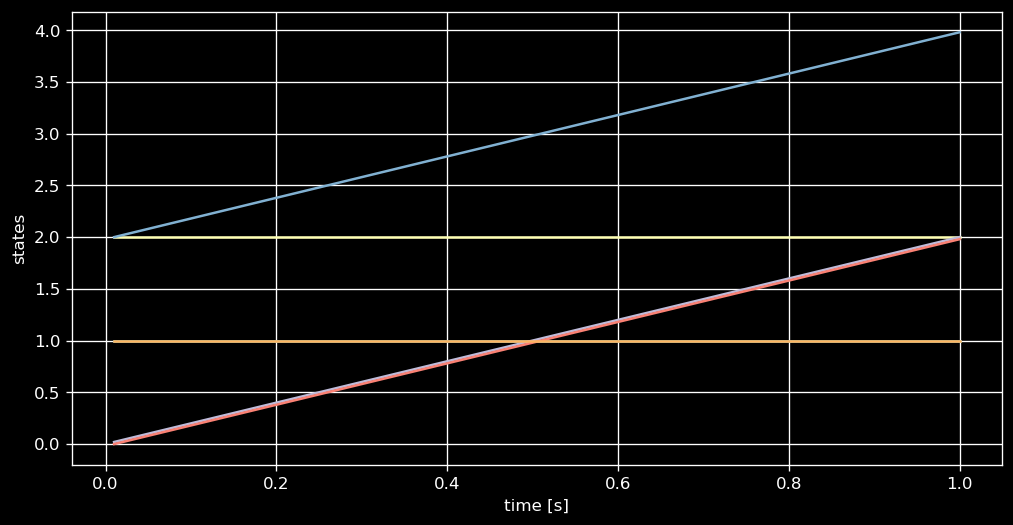

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi=120)

for d in data:
    ax.plot(time, d)
    
ax.grid(True)
ax.set_xlabel("time [s]")
ax.set_ylabel("states")

plt.savefig("plot.png")

In [5]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --ClearOutput.enabled=True --to markdown README.ipynb

[NbConvertApp] Converting notebook README.ipynb to markdown
[NbConvertApp] Support files will be in README_files\
[NbConvertApp] Making directory README_files
[NbConvertApp] Writing 1373 bytes to README.md
